# Malária Cells - Residual Networks

https://arxiv.org/pdf/1512.03385.pdf

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow.contrib.slim as slim
import random

In [6]:
%matplotlib inline

In [26]:
IMG_SIZE = (110, 110)
COLOR_CHANNELS = 3

### Data Sample

Sample of an uninfected cell image

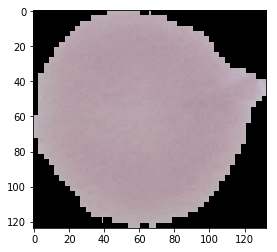

In [7]:
sample_uninfected = cv.imread('/media/miguel/Novo volume/cell_images/Uninfected/C179P140ThinF_IMG_20151127_153521_cell_155.png')
plt.imshow(sample_uninfected)

Sample of an parasitized cell image

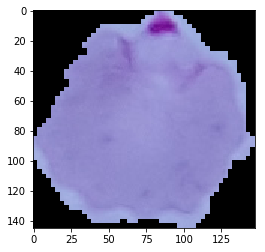

In [16]:
sample_parasitized = cv.imread('/media/miguel/Novo volume/cell_images/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_36.png')
plt.imshow(sample_parasitized)

In [82]:
p_path = '/media/miguel/Novo volume/cell_images/Parasitized'
u_path = '/media/miguel/Novo volume/cell_images/Uninfected'

Load Data

In [83]:
import glob

In [84]:
p_names = glob.glob(p_path+"/*.png")
u_names = glob.glob(u_path+"/*.png")

In [85]:
def load_batch(batch_size):
    batch_x, batch_y = [], []
    for i in range(batch_size):
        if random.choice([True, False]): #Uninfected
            name = u_names[random.randrange(len(u_names))]
            label = [0]
        else: #Parasitized
            name = p_names[random.randrange(len(p_names))]
            label = [1]
        batch_x.append(cv.resize(cv.imread(name), IMG_SIZE))
        batch_y.append(label)
    return batch_x, batch_y

## Building the Model

In [86]:
model_input = tf.placeholder(tf.float32, shape=[None, IMG_SIZE[0], IMG_SIZE[0], COLOR_CHANNELS])
labels = tf.placeholder(tf.float32, shape=[None, 1])
learning_rate = tf.placeholder('float', [])

In [87]:
def model(x):
    hl = tf.layers.batch_normalization(x)
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 86, [5,5]))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 128, [3, 3]))
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 128, [3, 3]))
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 86, [3, 3]))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = slim.flatten(hl)
    print(hl.shape)
    hl = tf.nn.sigmoid(slim.stack(hl, slim.fully_connected, [3096, 1569, 564, 84, 1]))
    print(hl.shape)
    
    return hl

In [88]:
prediction = model(model_input)

(?, 110, 110, 3)
(?, 54, 54, 3)
(?, 54, 54, 86)
(?, 26, 26, 86)
(?, 26, 26, 128)
(?, 26, 26, 128)
(?, 26, 26, 86)
(?, 12, 12, 86)
(?, 12384)
(?, 1)


In [94]:
loss = tf.reduce_mean((prediction - labels)**2)
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [95]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [98]:
batch_size = 20
steps = 10000
rate = 3e-4

In [99]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = load_batch(batch_size)
        feed = {model_input:batch_x, labels:batch_y, learning_rate:rate}
        sess.run(train, feed_dict=feed)
        
        if i%10 == 0:
            val_x, val_y = load_batch(10)
            feed_validation = {model_input:val_x, labels:val_y}
            print(sess.run(loss, feed_dict=feed_validation))
            
    location = '../saved_models/modelo.ckpt'
    save_path = (saver.save(sess, location))
    print('model saved in', location)

0.25
0.3
0.4
0.5
0.5
0.8
0.8
0.3
0.6
0.8
0.1
0.3
0.9
0.6
0.5
0.5
0.6
0.5
0.5
0.5
0.3
0.4
0.4
0.4
0.5
0.5
0.4
0.4
0.5
0.2
0.6
0.4
0.6
0.3
0.5
0.8
0.9
0.3
0.8
0.5
0.5
0.4
0.4
0.4
0.7
0.6
0.5
0.8
0.6
0.2
0.5
0.7
0.6
0.6
0.3
0.5


KeyboardInterrupt: 